In [1]:
#Libraries

import pandas as pd
pd.options.mode.chained_assignment = None
import requests
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_palette("rocket")
import matplotlib.pyplot as plt
import numpy as np

import clean as cl

# IMPORTING AND CLEANING NBA Stats 2021/2022

In [2]:
# Importing NBA Stats 2021/2022 CSV
df = pd.read_csv('../data/NBA_Stats_202122.csv', sep=';', encoding='unicode_escape')
df

,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,FTA,...,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,"VIVersatility IndexVersatility index is a metric that measures a playerÕs ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
0,Precious Achiuwa,Tor,F,"22,56",73,"23,6","49,2","18,5","11,3",131,...,"6,5","14,9","1,1","6,9","0,51","0,56","1,15","6,8","105,4",104
1,Steven Adams,Mem,C,"28,73",76,"26,3","54,8",12,"19,6",199,...,10,"19,9","3,4","16,1","0,87","0,79","1,51","9,4","124,7","103,9"
2,Bam Adebayo,Mia,C-F,"24,73",56,"32,6","67,9",25,"14,4",340,...,"10,1","17,5","3,4","17,5","1,43","0,79","2,64","10,7","117,2","98,2"
3,Santi Aldama,Mem,F-C,"21,25",32,"11,2","23,4","18,5","9,9",32,...,"2,7","12,6","0,7","7,7","0,19","0,31","0,5","7,1","101,1","103,9"
4,LaMarcus Aldridge,Bro,C-F,"36,73",47,"22,3","46,5","22,4",8,102,...,"5,5","13,4","0,9","6,3","0,3",1,"0,94","7,2","119,6","108,8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,Thaddeus Young,Tor,F,"33,8",26,"18,3","38,1",16,"12,4",27,...,"4,4",13,"1,7","13,6","1,19","0,42","0,85","7,9","112,8",102
712,Trae Young,Atl,G,"23,56",76,"34,9","72,7","34,4","14,5",553,...,"3,7","5,9","9,7","46,8","0,96","0,09","3,99","11,5","119,5","114,3"
713,Omer Yurtseven,Mia,C,"23,81",56,"12,6","26,3","19,8",13,61,...,"5,3","23,6","0,9",11,"0,3","0,36","0,73","9,3","113,3","94,7"
714,Cody Zeller,Por,F-C,"29,51",27,"13,1","27,4",16,"14,6",49,...,"4,6","19,3","0,8","9,4","0,3","0,22","0,7","8,2","128,3","101,8"


In [3]:
# Creating a new subset and renaming columns
df_2 = cl.new_subset(df)
df_2

,FULL NAME,TEAM,POS,AGE,TS%,PPG,RPG,APG,SPG,BPG,TOPG
0,Precious Achiuwa,Tor,F,"22,56","0,503","9,1","6,5","1,1","0,51","0,56","1,15"
1,Steven Adams,Mem,C,"28,73","0,56","6,9",10,"3,4","0,87","0,79","1,51"
2,Bam Adebayo,Mia,C-F,"24,73","0,608","19,1","10,1","3,4","1,43","0,79","2,64"
3,Santi Aldama,Mem,F-C,"21,25","0,452","4,1","2,7","0,7","0,19","0,31","0,5"
4,LaMarcus Aldridge,Bro,C-F,"36,73","0,604","12,9","5,5","0,9","0,3",1,"0,94"
...,...,...,...,...,...,...,...,...,...,...,...
711,Thaddeus Young,Tor,F,"33,8","0,526","6,3","4,4","1,7","1,19","0,42","0,85"
712,Trae Young,Atl,G,"23,56","0,603","28,4","3,7","9,7","0,96","0,09","3,99"
713,Omer Yurtseven,Mia,C,"23,81","0,546","5,3","5,3","0,9","0,3","0,36","0,73"
714,Cody Zeller,Por,F-C,"29,51","0,627","5,2","4,6","0,8","0,3","0,22","0,7"


In [4]:
#Converting numeric columns to floats
df_2 = cl.floats(df_2)
df_2.dtypes

FULL NAME     object
TEAM          object
POS           object
AGE          float64
TS%          float64
PPG          float64
RPG          float64
APG          float64
SPG          float64
BPG          float64
TOPG         float64
dtype: object

In [5]:
# Calculating player efficiency with the formula created by Kansas City sports reporter and statistician Martin Manley
df_2 = cl.player_eff(df_2)
df_2

,FULL NAME,TEAM,POS,AGE,TS%,PPG,RPG,APG,SPG,BPG,TOPG,MPPG,EFF
0,Precious Achiuwa,Tor,F,22.56,0.503,9.1,6.5,1.1,0.51,0.56,1.15,4.5227,12.0973
1,Steven Adams,Mem,C,28.73,0.560,6.9,10.0,3.4,0.87,0.79,1.51,3.0360,17.4140
2,Bam Adebayo,Mia,C-F,24.73,0.608,19.1,10.1,3.4,1.43,0.79,2.64,7.4872,24.6928
3,Santi Aldama,Mem,F-C,21.25,0.452,4.1,2.7,0.7,0.19,0.31,0.50,2.2468,5.2532
4,LaMarcus Aldridge,Bro,C-F,36.73,0.604,12.9,5.5,0.9,0.30,1.00,0.94,5.1084,14.5516
...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,Thaddeus Young,Tor,F,33.80,0.526,6.3,4.4,1.7,1.19,0.42,0.85,2.9862,10.1738
712,Trae Young,Atl,G,23.56,0.603,28.4,3.7,9.7,0.96,0.09,3.99,11.2748,27.5852
713,Omer Yurtseven,Mia,C,23.81,0.546,5.3,5.3,0.9,0.30,0.36,0.73,2.4062,9.0238
714,Cody Zeller,Por,F-C,29.51,0.627,5.2,4.6,0.8,0.30,0.22,0.70,1.9396,8.4804


In [6]:
# Dropping unnecessary columns for analysis and cleaning the remaining columns
df_2 = cl.drop_clean(df_2)
df_2

,FULL NAME,TEAM,POSITION,AGE,EFFICIENCY
0,Precious Achiuwa,Toronto Raptors,Small Forward (3),22,12.0973
1,Steven Adams,Memphis Grizzlies,Center (5),28,17.4140
2,Bam Adebayo,Miami Heat,Power Forward (4),24,24.6928
3,Santi Aldama,Memphis Grizzlies,Power Forward (4),21,5.2532
4,LaMarcus Aldridge,Brooklyn Nets,Power Forward (4),36,14.5516
...,...,...,...,...,...
711,Thaddeus Young,Toronto Raptors,Small Forward (3),33,10.1738
712,Trae Young,Atlanta Hawks,Point Guard (1),23,27.5852
713,Omer Yurtseven,Miami Heat,Center (5),23,9.0238
714,Cody Zeller,Portland Trail Blazers,Power Forward (4),29,8.4804


# WEB SCRAPING SALARIES

In [7]:
res = requests.get('https://hoopshype.com/salaries/players/2021-2022/')
html = res.content
soup = BeautifulSoup(html, "html.parser")

In [8]:
# Web scraping names
names_list = cl.names(soup)
names_list[:5]

['Stephen Curry',
 'John Wall',
 'James Harden',
 'Russell Westbrook',
 'Kevin Durant']

In [9]:
# Web scraping salaries
salaries_list = cl.salaries(soup)
salaries_list[:5]

[49928610, 48325294, 48325294, 48216568, 45825710]

In [10]:
#Creating salaries dataframe
salaries_df = pd.DataFrame({"full_name_1" : names_list, "SALARY" : salaries_list})
salaries_df

,full_name_1,SALARY
0,Stephen Curry,49928610
1,John Wall,48325294
2,James Harden,48325294
3,Russell Westbrook,48216568
4,Kevin Durant,45825710
...,...,...
648,Jaime Echenique,57993
649,Luca Vildoza,46665
650,Zavier Simpson,40595
651,Mfiondu Kabengele,20924


# WEB SCRAPING INSTAGRAM FOLLOWERS

In [11]:
res = requests.get('https://www.popularbasketballers.com/')
html = res.content
soup = BeautifulSoup(html, "html.parser")

In [12]:
# Web scraping names and followers
full_name_list, followers_list = cl.followers(soup)
print(full_name_list[:5])
print(followers_list[:5])

['LeBron James', 'Stephen Curry', 'Russell Westbrook', 'Kyrie Irving', 'Lonzo Ball']
[133332035, 46394997, 20663214, 17343900, 14938820]


In [13]:
#Creating followers dataframe
followers_df = pd.DataFrame({"full_name_2" : full_name_list, "FOLLOWERS" : followers_list})
followers_df

,full_name_2,FOLLOWERS
0,LeBron James,133332035
1,Stephen Curry,46394997
2,Russell Westbrook,20663214
3,Kyrie Irving,17343900
4,Lonzo Ball,14938820
...,...,...
462,Julian Champagnie,10970
463,Eugene Omoruyi,10000
464,Terry Taylor,7944
465,Javon Freeman-Liberty,7100


# MERGING DATAFRAMES

In [14]:
df_merge = pd.merge(df_2, salaries_df, left_on='FULL NAME', right_on='full_name_1', how='left')
final_df = pd.merge(df_merge, followers_df, left_on='FULL NAME', right_on='full_name_2', how='left')
final_df

,FULL NAME,TEAM,POSITION,AGE,EFFICIENCY,full_name_1,SALARY,full_name_2,FOLLOWERS
0,Precious Achiuwa,Toronto Raptors,Small Forward (3),22,12.0973,Precious Achiuwa,2956915.0,Precious Achiuwa,178612.0
1,Steven Adams,Memphis Grizzlies,Center (5),28,17.4140,Steven Adams,18619958.0,Steven Adams,518545.0
2,Bam Adebayo,Miami Heat,Power Forward (4),24,24.6928,Bam Adebayo,30649609.0,Bam Adebayo,844028.0
3,Santi Aldama,Memphis Grizzlies,Power Forward (4),21,5.2532,NaN,NaN,Santi Aldama,16453.0
4,LaMarcus Aldridge,Brooklyn Nets,Power Forward (4),36,14.5516,LaMarcus Aldridge,2881021.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
711,Thaddeus Young,Toronto Raptors,Small Forward (3),33,10.1738,Thaddeus Young,15475579.0,NaN,NaN
712,Trae Young,Atlanta Hawks,Point Guard (1),23,27.5852,Trae Young,9080829.0,Trae Young,4791317.0
713,Omer Yurtseven,Miami Heat,Center (5),23,9.0238,Omer Yurtseven,1623970.0,Omer Yurtseven,78776.0
714,Cody Zeller,Portland Trail Blazers,Power Forward (4),29,8.4804,Cody Zeller,2606136.0,Cody Zeller,41028.0


In [15]:
# Dropping unnecessary columns and rows with nan values and converting numeric columns into integers
final_df = cl.clean_final(final_df)
final_df

,FULL NAME,TEAM,POSITION,AGE,EFFICIENCY,SALARY,FOLLOWERS
0,Precious Achiuwa,Toronto Raptors,Small Forward (3),22,12,2956915,178612
1,Steven Adams,Memphis Grizzlies,Center (5),28,17,18619958,518545
2,Bam Adebayo,Miami Heat,Power Forward (4),24,25,30649609,844028
3,Nickeil Alexander-Walker,New Orleans Pelicans,Point Guard (1),23,12,3556962,130983
4,Nickeil Alexander-Walker,Utah Jazz,Point Guard (1),23,4,3556962,130983
...,...,...,...,...,...,...,...
391,Delon Wright,Atlanta Hawks,Point Guard (1),29,9,9298779,123608
392,Trae Young,Atlanta Hawks,Point Guard (1),23,28,9080829,4791317
393,Omer Yurtseven,Miami Heat,Center (5),23,9,1623970,78776
394,Cody Zeller,Portland Trail Blazers,Power Forward (4),29,8,2606136,41028


# VISUALIZATIONS

## MOST POPULAR PLAYERS

<AxesSubplot:xlabel='FOLLOWERS', ylabel='FULL NAME'>

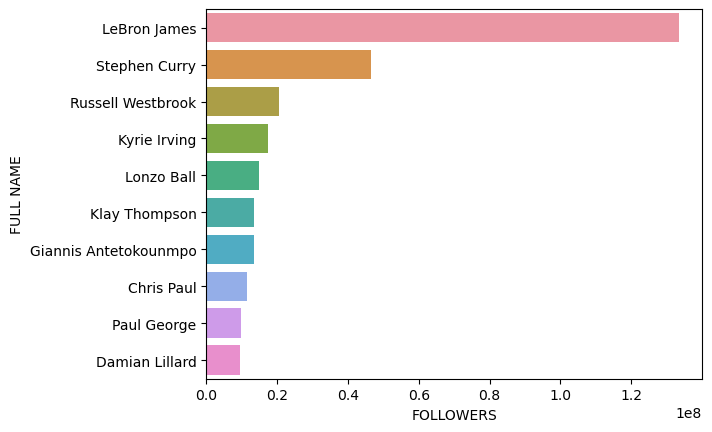

In [37]:
player_followers = final_df[["FULL NAME","FOLLOWERS"]].reset_index().sort_values("FOLLOWERS", ascending = False)[:10]
sns.barplot(x='FOLLOWERS', y='FULL NAME', data=player_followers)

## TEAMS WITH HIGHER SALARIES

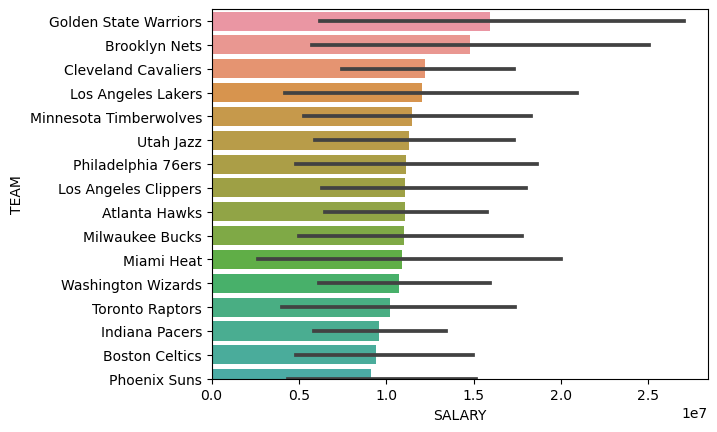

In [36]:
result = final_df.groupby(["TEAM"])['SALARY'].aggregate(np.mean).reset_index().sort_values('SALARY', ascending=False)
sns.barplot(x='SALARY', y="TEAM", data=final_df, order=result['TEAM'])
plt.ylim(15)
plt.show()

## POSITION RELATIONSHIPS

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Point Guard (1)'),
  Text(1, 0, 'Shooting Guard (2)'),
  Text(2, 0, 'Small Forward (3)'),
  Text(3, 0, 'Power Forward (4)'),
  Text(4, 0, 'Center (5)')])

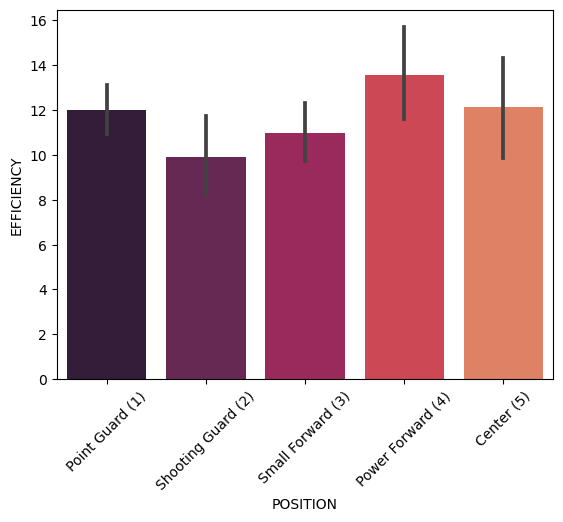

In [20]:
sns.barplot(x="POSITION", y="EFFICIENCY", data=final_df, order=['Point Guard (1)','Shooting Guard (2)','Small Forward (3)','Power Forward (4)','Center (5)'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Point Guard (1)'),
  Text(1, 0, 'Shooting Guard (2)'),
  Text(2, 0, 'Small Forward (3)'),
  Text(3, 0, 'Power Forward (4)'),
  Text(4, 0, 'Center (5)')])

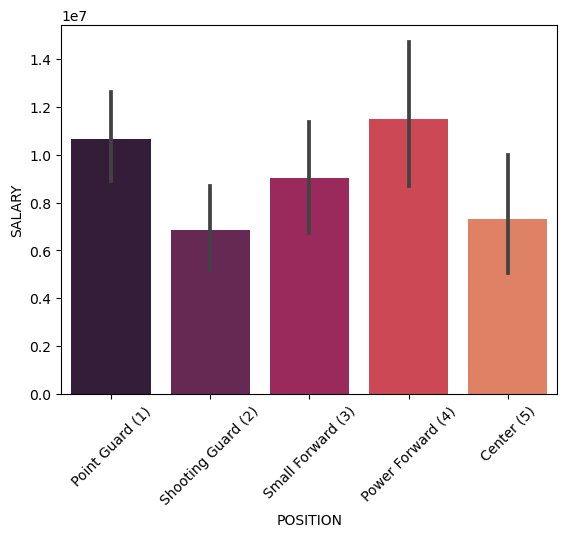

In [21]:
sns.barplot(x="POSITION", y="SALARY", data=final_df, order=['Point Guard (1)','Shooting Guard (2)','Small Forward (3)','Power Forward (4)','Center (5)'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Point Guard (1)'),
  Text(1, 0, 'Shooting Guard (2)'),
  Text(2, 0, 'Small Forward (3)'),
  Text(3, 0, 'Power Forward (4)'),
  Text(4, 0, 'Center (5)')])

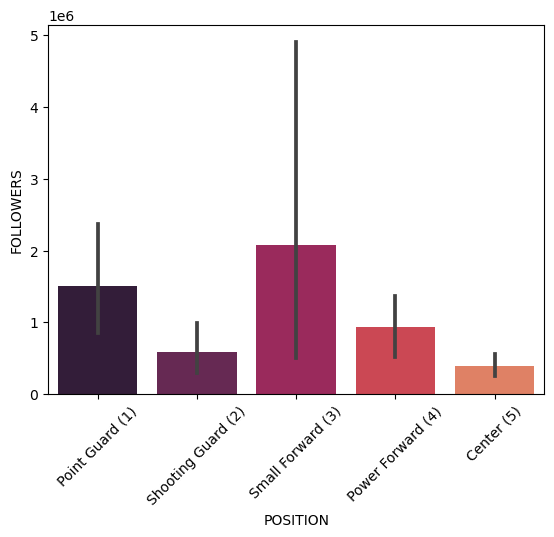

In [22]:
sns.barplot(x="POSITION", y="FOLLOWERS", data=final_df, order=['Point Guard (1)','Shooting Guard (2)','Small Forward (3)','Power Forward (4)','Center (5)'])
plt.xticks(rotation=45)

## AGE VISUALIZATION

<AxesSubplot:xlabel='AGE'>

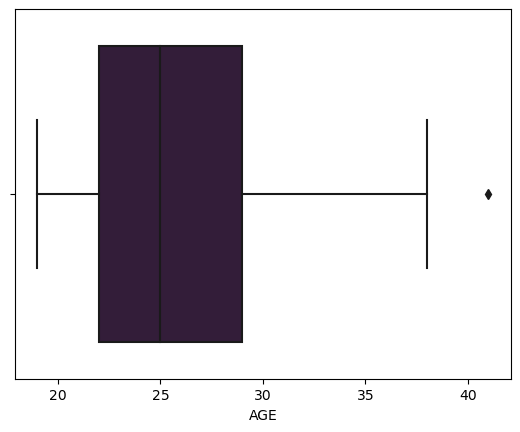

In [23]:
sns.boxplot(x = 'AGE', data=final_df)

In [24]:
final_df['AGE'].describe()


count    396.000000
mean      26.005051
std        4.360348
min       19.000000
25%       22.000000
50%       25.000000
75%       29.000000
max       41.000000
Name: AGE, dtype: float64

## RELATIONSHIP BETWEEN EFFICIENCY, SALARY AND FOLLOWERS

<AxesSubplot:xlabel='SALARY', ylabel='EFFICIENCY'>

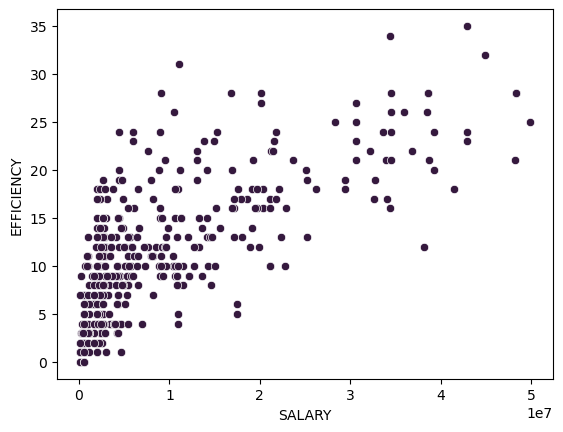

In [25]:
sns.scatterplot(x="SALARY", y="EFFICIENCY", data=final_df)

(0.0, 10000000.0)

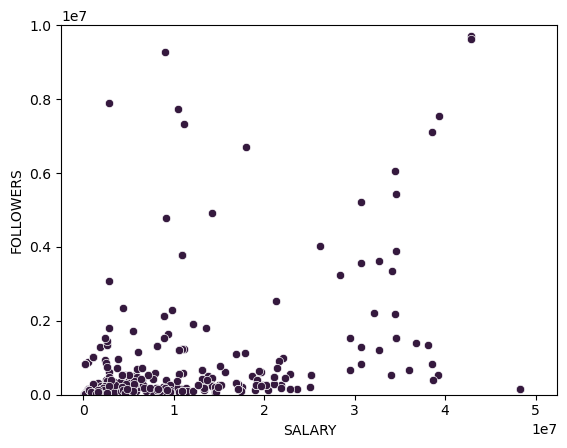

In [26]:
sns.scatterplot(x="SALARY", y="FOLLOWERS", data=final_df)
plt.ylim(0, 10000000)

(0.0, 10000000.0)

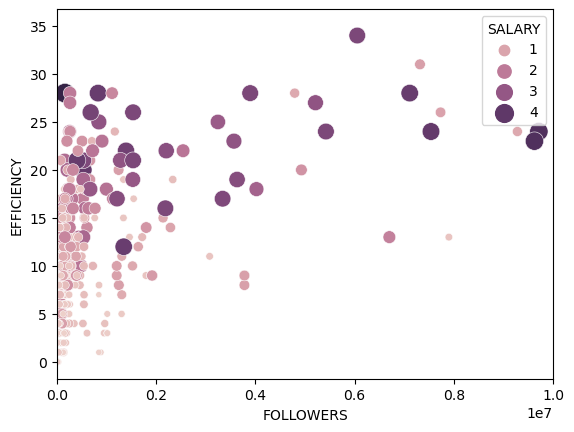

In [27]:
sns.scatterplot(x="FOLLOWERS", y="EFFICIENCY", data=final_df, size="SALARY", hue='SALARY', sizes=(20,200))
plt.xlim(0, 10000000)